In [45]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [61]:
def brownian1(interval, step, x0):
  n = int(interval / step)
  B = [x0]
  for i in range(n):
    B.append(np.sqrt(step) * np.random.standard_normal() + B[-1])
  return np.array(B)

In [62]:
def brownian(interval, step, x0):
  n = int(interval / step)
  times = np.linspace(0.0, interval, n+1)
  dB = np.sqrt(step) * np.random.normal(size=(n,))
  B0 = np.zeros((1,)) + x0
  B = np.concatenate((B0, np.cumsum(dB) + x0))
  return B

0.018013954162597656
0.019346952438354492


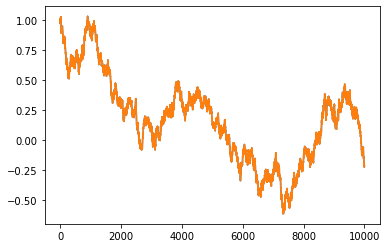

In [63]:
np.random.seed(12)
t= time.time()
B = brownian(1, 0.0001, 1)
plt.plot(B)
print(time.time()-t)

np.random.seed(12)
t= time.time()
B1 = brownian1(1, 0.0001, 1)
plt.plot(B1)
print(time.time()-t)

#**8.1. Temperature of a rod**

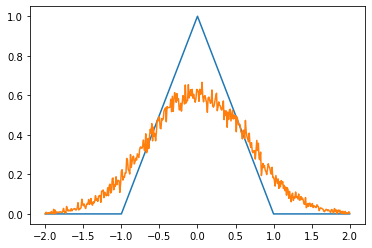

In [44]:
g = lambda x : (1-np.abs(x)).clip(min=0)
y = np.linspace(-2.0, 2.0, 401)
plt.plot(y, g(y))
f = np.zeros((401,))
for x in range(-200, 201):
  for i in range(100):
    B = brownian(1, 0.01, x*0.01)
    f[x+200] += g(B[25])
  f[x+200] /= 100
plt.plot(y, f)

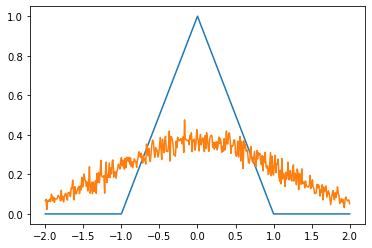

In [57]:
g = lambda x : (1-np.abs(x)).clip(min=0)
y = np.linspace(-2.0, 2.0, 401)
plt.plot(y, g(y))
f = np.zeros((401,))
for x in range(-200, 201):
  for i in range(100):
    B = brownian(1, 0.01, x*0.01)
    f[x+200] += g(B[100])
  f[x+200] /= 100
plt.plot(y, f)

#**8.2. A strange martingale**

2.938450877369309
3.27452388535333
7.218188630923517


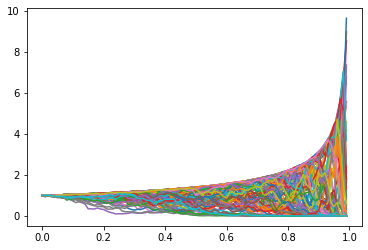

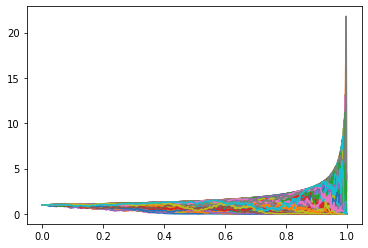

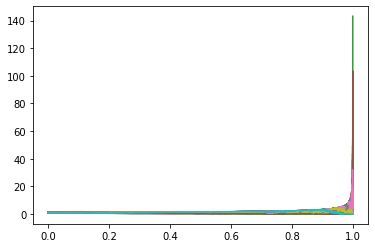

In [77]:
for d in [0.01, 0.001, 0.00001]:
  t = np.linspace(0.0, 1-d, int(1/d))
  E = 0
  plt.figure()
  for i in range(100):
    B = brownian(1, d, 0)
    B = B [:-1]
    M = np.exp(-0.5 * B**2 / (1-t)) / np.sqrt(1-t)
    plt.plot(t, M)
    E += np.max(M)/100
  print(E)

There are some of the paths that kind of diverge although we have a martingale.

#**8.3. Smoluchowski's equation**

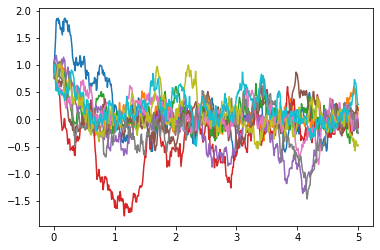

In [95]:
x0 = 1
mu = lambda x : -2 * np.sign(x)
sigma = lambda x : 1
x = np.linspace(0.0, 5.0, 501)
for i in range(10):
  B = brownian(5, 0.01, 0)
  S = np.zeros((501),)
  S[0] = x0
  for j in range(500):
    S[j+1] = sigma(S[j]) * (B[j+1] - B[j]) + mu(S[j]) * 0.01 + S[j]
  plt.plot(x, S)

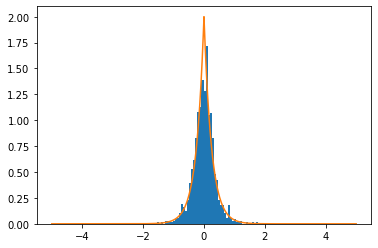

In [107]:
X5 = []
mu = lambda x : -2 * np.sign(x)
sigma = lambda x : 1
x = np.linspace(0.0, 5.0, 501)
for i in range(1000):
  B = brownian(5, 0.01, 0)
  S = np.zeros((501),)
  S[0] = 1
  for j in range(500):
    S[j+1] = sigma(S[j]) * (B[j+1] - B[j]) + mu(S[j]) * 0.01 + S[j]
  X5.append(S[-1])
n, bins, patches = plt.hist(X5, 50, density=True)
y = np.linspace(-5.0, 5.0, 1001)
plt.plot(y, 2*np.exp(-4*np.abs(y)))
#plt.hist()

#**8.4. Invariant distribution of the CIR model**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


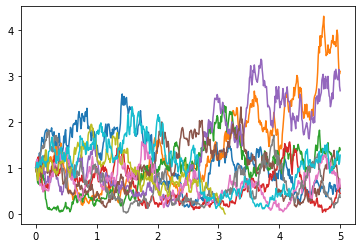

In [108]:
x0 = 1
mu = lambda x : 1-x
sigma = lambda x : np.sqrt(x)
x = np.linspace(0.0, 5.0, 501)
for i in range(10):
  B = brownian(5, 0.01, 0)
  S = np.zeros((501),)
  S[0] = x0
  for j in range(500):
    S[j+1] = sigma(S[j]) * (B[j+1] - B[j]) + mu(S[j]) * 0.01 + S[j]
  plt.plot(x, S)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


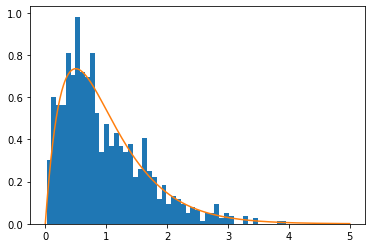

In [105]:
X5 = []
mu = lambda x : 1-x
sigma = lambda x : np.sqrt(x)
x = np.linspace(0.0, 5.0, 501)
for i in range(1000):
  B = brownian(5, 0.01, 0)
  S = np.zeros((501),)
  S[0] = 1
  for j in range(500):
    S[j+1] = sigma(S[j]) * (B[j+1] - B[j]) + mu(S[j]) * 0.01 + S[j]
  X5.append(S[-1])
n, bins, patches = plt.hist(X5, 50, density=True)
plt.plot(x, 4*x*np.exp(-2*x))